# Bonus geopandas example

Geopandas relies on a stack of dependencies that are notoriously finicky to install.
For tutorial purposes, please do not spend a lot of time attempting to install it,
unless you are very committed in experimenting with geodata in particular!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
from matplotlib import colors

In [2]:
gdf = geopandas.read_file('census-data/census_geo.shp')

In [3]:
gdf.head()

,GEOID,NAME,geometry
0,6075,"San Francisco County, California","MULTIPOLYGON (((-13649137.130 4553355.950, -13..."
1,6081,"San Mateo County, California","POLYGON ((-13646334.440 4521323.060, -13646298..."
2,6001,"Alameda County, California","POLYGON ((-13612245.300 4538149.390, -13612345..."
3,6039,"Madera County, California","POLYGON ((-13370181.620 4462431.440, -13370113..."
4,6107,"Tulare County, California","POLYGON ((-13225170.620 4271811.660, -13225307..."


In [4]:
df = pd.read_csv('census-data/counties.csv')
df.head()

,GEOID,NAME,area,estimate,ratio,density
0,6075,"San Francisco County, California",232.497093,757415,1.040857,3257.739650
1,6081,"San Mateo County, California",743.365017,607919,0.958609,817.793393
2,6001,"Alameda County, California",823.373527,1312727,0.947308,1594.327432
3,6039,"Madera County, California",2161.238868,112580,0.897362,52.090494
4,6107,"Tulare County, California",4868.434787,318740,0.979924,65.470734


In [5]:
gdf2 = gdf.merge(df, left_on = "GEOID", right_on = "GEOID")
gdf2.head()

,GEOID,NAME_x,geometry,NAME_y,area,estimate,ratio,density
0,6075,"San Francisco County, California","MULTIPOLYGON (((-13649137.130 4553355.950, -13...","San Francisco County, California",232.497093,757415,1.040857,3257.739650
1,6081,"San Mateo County, California","POLYGON ((-13646334.440 4521323.060, -13646298...","San Mateo County, California",743.365017,607919,0.958609,817.793393
2,6001,"Alameda County, California","POLYGON ((-13612245.300 4538149.390, -13612345...","Alameda County, California",823.373527,1312727,0.947308,1594.327432
3,6039,"Madera County, California","POLYGON ((-13370181.620 4462431.440, -13370113...","Madera County, California",2161.238868,112580,0.897362,52.090494
4,6107,"Tulare County, California","POLYGON ((-13225170.620 4271811.660, -13225307...","Tulare County, California",4868.434787,318740,0.979924,65.470734


# Default map with population per county

The most convenient thing geopandas will do for you is plot maps.
Mixing and matching plotting code styles works almost exactly like it does with pandas.

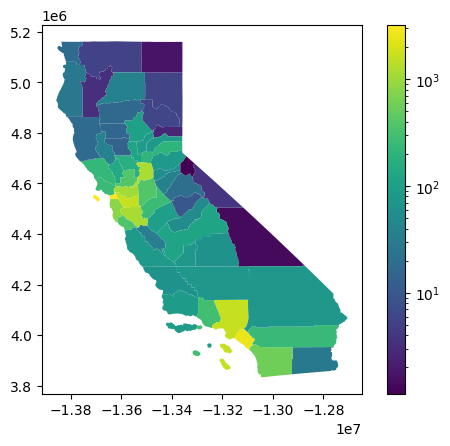

In [6]:
from matplotlib import colors

# Simply setting "norm = 'log'" does not work here
# So, I have followed some matplotlib docs for normalizing colorbars:
# https://matplotlib.org/stable/tutorials/colors/colormapnorms.html
# This relies on the assumption that the "norm" argument will get
#  passed to matplotlib and then operate as usual in that context
ax = gdf2.plot(
    #'estimate',
    'density',
    legend=True,
    #norm = colors.LogNorm(gdf2['estimate'].min(), gdf2['estimate'].max()),
    norm = colors.LogNorm(gdf2['density'].min(), gdf2['density'].max()),
)

# Save the first version
plt.savefig('plots/part-4-before.png', bbox_inches='tight')

To show the full power of this mix-and-match strategy, let's get a little bit picky about the colorbar arrangement of this plot.
Note that this is possible in regular pandas as well, anytime a colorbar is involved.

Current ax position: Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0)
New ax position: Bbox(x0=0.06665353564968096, y0=0.0, x1=0.9333464643503191, y1=1.0)


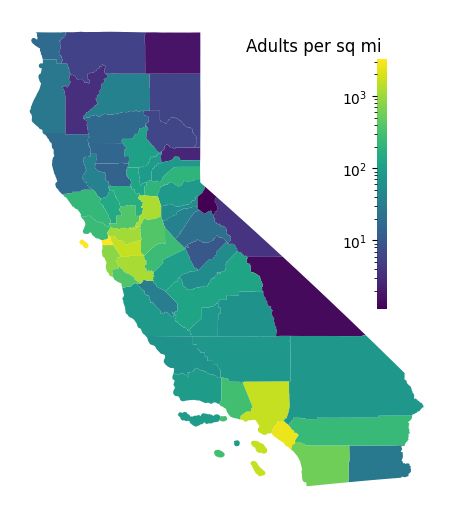

In [7]:
# Start with a figure that we want to be square
fig = plt.figure(figsize = (5,5))

# Now we will add axes by hand
# This is admittedly manual, but allows very fine control
ax = fig.add_axes([0,0,1,1])
cax = fig.add_axes([0.8,0.4,0.02,0.5])

# Now add the map
# Notice that it shrinks the axis as necessary!
print(f"Current ax position: {ax.get_position()}")
gdf2.plot('density',legend=True, ax = ax, cax = cax,
          norm = colors.LogNorm(gdf2['density'].min(), gdf2['density'].max()))
print(f"New ax position: {ax.get_position()}")

# We don't want any frame or ticks or anything on the map
ax.axis('off')

# We want to label the colorbar, and have ticks but no border
cax.set_title('Adults per sq mi', ha = 'right')
cax.set_frame_on(False)
cax.yaxis.tick_left()

# Save WITHOUT the "tight" kw to ensure the figure stays square
plt.savefig('plots/part-4-after.png')